# Enoncé
1. Implantez une fonction recevant une liste de couples (xi,yi) ainsi qu'une liste d'abscisses αi, et qui renvoie la liste des valeurs P(αi), P
 étant le polynôme d'interpolation de Lagrange construit sur les points (xi,yi).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import lagrange
import time

In [2]:
def poly(couples, α):
    inter_values = []
    
    for alpha in α:
        value = 0
        for k in range(len(couples)):
            num = 1
            denom = 1
            for m in range(len(couples)):
                if m != k:
                    num *= (alpha - couples[m][0])
                    denom *= (couples[k][0] - couples[m][0])
            value += couples[k][1] * (num / denom)
        
        inter_values.append(value)
    
    return inter_values

couples = [(1, 2), (2, 3), (3, 5)]  
α = [1.5, 2.5, 3.5]
result = poly(couples, α)

for alpha, value in zip(α, result):
    print(f"Pour x = {alpha}, P({alpha}) = {value}")

Pour x = 1.5, P(1.5) = 2.375
Pour x = 2.5, P(2.5) = 3.875
Pour x = 3.5, P(3.5) = 6.375


# Enoncé
2. Implantez cette même fonction par le biais de la méthode barycentrique et comparez les deux méthodes en termes de vitesses d'exécution avec des listes αi conséquentes.


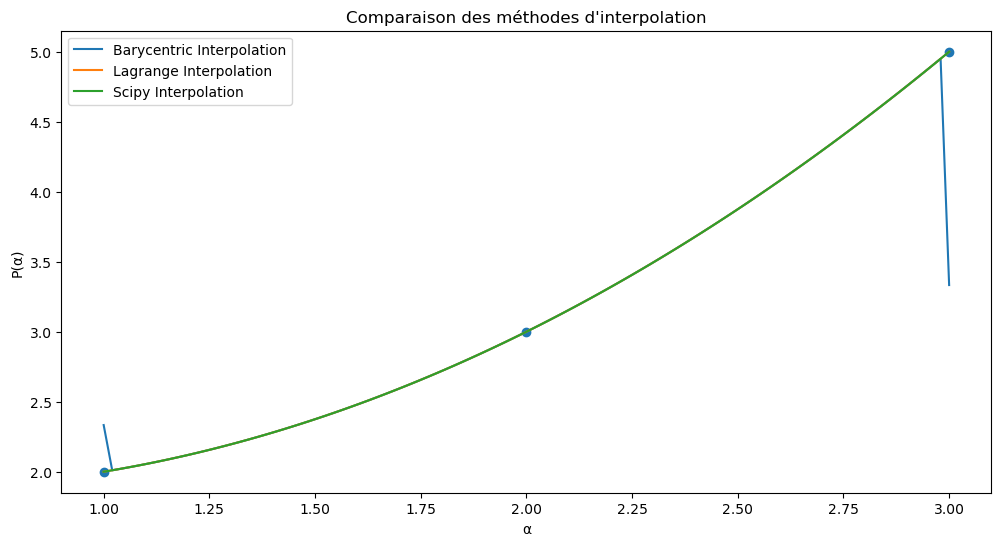

In [3]:
def barycentric(couples, alphas):
    inter_values = []
    Ai = [np.prod([1 / (couples[i][0] - couples[j][0]) for j in range(len(couples)) if j != i]) for i in range(len(couples))]
    
    for alpha in alphas:
        num_sum = 0
        denom_sum = 0
        for i in range(len(couples)):
            if alpha - couples[i][0] != 0:
                num_sum += couples[i][1] * Ai[i] / (alpha - couples[i][0])
                denom_sum += Ai[i] / (alpha - couples[i][0])
        
        if denom_sum != 0:
            value = num_sum / denom_sum
        else:
            value = None
        
        inter_values.append(value)
    
    return inter_values

couples = [(1, 2), (2, 3), (3, 5)]  
x = [p[0] for p in couples]
y = [p[1] for p in couples]
alphas = np.linspace(1, 3, 100)  

# Barycentrique
result_barycentric = barycentric(couples, alphas)

# Lagrange
result_lagrange = poly(couples, alphas)

# scipy.interpolate
lagrange_poly = interpolate.lagrange([couple[0] for couple in couples], [couple[1] for couple in couples])
result_interpolate = lagrange_poly(alphas)

# Comparaisons
plt.figure(figsize=(12, 6))
plt.plot(alphas, result_barycentric, label='Barycentric Interpolation')
plt.plot(alphas, result_lagrange, label='Lagrange Interpolation')
plt.plot(alphas, result_interpolate, label='Scipy Interpolation')
plt.scatter(x,y)
plt.legend()
plt.xlabel('α')
plt.ylabel('P(α)')
plt.title("Comparaison des méthodes d'interpolation")
plt.show()

# Enoncé
3. Implantez le calcul de P(α) par l'algorithme de Neville-Atiken. Comparez sur quelques exemples la vitesse de convergence jusqu'à une certaine précision dans les cas suivants :
   
    a. Les (xi,yi) sont intégrés au calcul dans un ordre aléatoire (éventuellement celui fourni par l'utilisateur)
   
    b. Les (xi,yi) sont intégrés au calcul dans l'ordre de la distance décroissante entre xi et α.
   
    c. Les (xi,yi) sont intégrés au calcul dans l'ordre de la distance croissante entre xi et α.

In [16]:
def neville_aitken(couples, alphaa, tolerance):
    n = len(couples)
    memory = np.zeros((n, n))
    
    for i in range(n):
        memory[i, 0] = couples[i][1]
    
    iterations = 0
    values = []
    for j in range(1, n):
        for i in range(n - j):
            xi, xj = couples[i][0], couples[i + j][0]
            memory[i, j] = ((alphaaa - xj) * memory[i, j - 1] - (alphaaa - xi) * memory[i + 1, j - 1]) / (xi - xj)
            values.append(memory[i, j])
            iterations += 1
            
            if j > 1 and np.all(np.abs(memory[i, j] - memory[i, j-1]) < tolerance):
                return memory[i, j], iterations, values, memory
    
    return memory[0, n - 1]

# Calcul des polynômes
result = neville_aitken(couples, 4, 0.01)
print(result)

NameError: name 'alphaaa' is not defined

In [15]:
def P(i,j,a,points): # Par Mr. Héroux
    if i == 0:
        memory[i,j] = points[j][1]
        print(memory)
        return memory[i,j]
    elif not np.isnan(memory[i,j]):
        print(memory)
        return memory[i,j]
    else:
        p = ((points[i+j][0] - a) * P(i-1, j, a, points) - (points[j][0] - a) * P(i-1, j+1, a, points))/(points[i+j][0] - points[j][0])
        memory[i,j] = p
        return p

points = [(np.random.uniform(-10, 10), np.random.uniform(-10, 10)) for _ in range(10)]
print(P(2,0,-2,points))

[[ 7.33885578  6.71556454 -4.4954244          nan]
 [ 7.93088079  0.88580785         nan         nan]
 [ 5.49724445         nan         nan         nan]
 [        nan         nan         nan         nan]]
5.497244448333524
